In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from cartopy import crs as ccrs, feature as cfeature
import metpy.calc as mpcalc
from glob import glob
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm
from os.path import join
import pickle
%matplotlib inline


In [10]:
rap_path = "/glade/p/cisl/aiml/conv_risk_intel/rap_ncei_nc/"
rap_height_path = "/glade/p/cisl/aiml/conv_risk_intel/rap_ncei_height/"
rap_date = pd.Timestamp("2019-09-27 01:00:00")
rap_datetime_str = rap_date.strftime("%Y%m%d_%H%M")
rap_file = join(rap_path, rap_date.strftime("%Y%m%d"), f"rap_130_{rap_datetime_str}_000.nc")
rap_height_file = join(rap_height_path, rap_date.strftime("%Y%m%d"), f"rap_130_{rap_datetime_str}_000.nc")
rap_ds = xr.open_dataset(rap_file)
rap_height_ds = xr.open_dataset(rap_height_file)

In [217]:
ls /glade/work/schreck/repos/evidential/main/results/ptype/evidential/evaluate

test.parquet  train.parquet  val.parquet


In [3]:
evidential_test = pd.read_parquet("/glade/work/schreck/repos/evidential/main/results/ptype/evidential/evaluate/test.parquet")


In [220]:
evidential_test.columns

Index(['T_DEWPOINT_C_0_m', 'T_DEWPOINT_C_250_m', 'T_DEWPOINT_C_500_m',
       'T_DEWPOINT_C_750_m', 'T_DEWPOINT_C_1000_m', 'T_DEWPOINT_C_1250_m',
       'T_DEWPOINT_C_1500_m', 'T_DEWPOINT_C_1750_m', 'T_DEWPOINT_C_2000_m',
       'T_DEWPOINT_C_2250_m',
       ...
       'true_label', 'pred_label', 'pred_conf', 'pred_conf1', 'pred_conf2',
       'pred_conf3', 'pred_conf4', 'evidential', 'aleatoric', 'epistemic'],
      dtype='object', length=450)

In [4]:
df = pd.read_parquet("/glade/work/schreck/repos/evidential/main/results/ptype/classifier/evaluate/test_0.parquet")
n_splits = 20
ensemble_p = np.zeros((n_splits, df.shape[0]))
ensemble_std = np.zeros((n_splits, df.shape[0]))
ensemble_entropy = np.zeros((n_splits, df.shape[0]))
ensemble_mutual = np.zeros((n_splits, df.shape[0]))

# Loop over ensemble of parametric models
for split in range(n_splits):
    dfe = pd.read_parquet(os.path.join("/glade/work/schreck/repos/evidential/main/results/ptype/classifier", "evaluate", f"test_{split}.parquet"))
    ensemble_p[split] = dfe["pred_conf"]
    ensemble_std[split] = dfe["epistemic"]
    ensemble_entropy[split] = dfe["entropy"]
    ensemble_mutual[split] = dfe["mutual_info"]
# Compute averages, uncertainties
df["ave_conf"] = np.mean(ensemble_p, axis = 0)
df["ave_entropy"] = np.mean(ensemble_entropy, axis = 0)
df["ave_mutual_info"] = np.mean(ensemble_mutual, axis = 0)
df["epistemic"] = np.var(ensemble_p, axis = 0)
df["aleatoric"] = np.mean(ensemble_std, axis = 0)

In [158]:
df

,T_DEWPOINT_C_0_m,T_DEWPOINT_C_250_m,T_DEWPOINT_C_500_m,T_DEWPOINT_C_750_m,T_DEWPOINT_C_1000_m,T_DEWPOINT_C_1250_m,T_DEWPOINT_C_1500_m,T_DEWPOINT_C_1750_m,T_DEWPOINT_C_2000_m,T_DEWPOINT_C_2250_m,...,pred_conf2,pred_conf3,pred_conf4,epistemic,entropy,mutual_info,ave_conf,ave_entropy,ave_mutual_info,aleatoric
0,2.410889,-0.957379,-2.243311,-3.802785,-5.708429,-7.332908,-8.801388,-10.142661,-11.252347,-12.073406,...,0.018732,0.024840,0.002803,0.000329,0.260529,0.004087,0.969306,0.244437,0.008351,0.000770
1,8.098389,2.591322,0.874778,0.366260,-0.118458,-0.578304,-1.100645,-1.675431,-2.568133,-4.557681,...,0.011622,0.016330,0.002291,0.000173,0.228567,0.006626,0.976857,0.208280,0.009366,0.000935
2,14.672699,13.433532,12.232489,10.988410,10.239020,10.617476,4.434367,-9.239601,-16.895347,-22.111354,...,0.003717,0.004065,0.001537,0.000008,0.117046,0.004195,0.994678,0.083865,0.004643,0.000223
3,6.672699,5.998072,5.618528,5.112516,4.053717,3.250990,2.377914,1.116599,-0.395443,-2.304316,...,0.002889,0.003705,0.001414,0.000045,0.105531,0.003509,0.987414,0.149990,0.006434,0.000384
4,8.797699,7.113395,5.985545,4.296435,1.977834,-0.526514,-3.076257,-5.491702,-7.620219,-9.440000,...,0.014752,0.017215,0.003007,0.000404,0.268756,0.008847,0.966667,0.265134,0.009456,0.001020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,-8.231049,-9.361849,-11.049303,-12.978566,-14.792818,-15.941623,-17.425023,-20.682461,-25.790119,-30.372738,...,0.970387,0.017004,0.010319,0.000235,0.244201,0.008123,0.970480,0.271502,0.008556,0.000797
1174,-7.293549,-8.756144,-10.449683,-12.509662,-14.075765,-17.103686,-22.150254,-27.340898,-30.864853,-32.559999,...,0.963827,0.021457,0.011822,0.000298,0.312777,0.005505,0.966522,0.289061,0.007736,0.000662
1175,-6.543549,-6.741108,-7.616778,-9.446198,-12.329894,-15.129481,-16.759712,-17.466550,-18.634587,-20.895918,...,0.964464,0.022407,0.010118,0.000637,0.255463,0.004827,0.953111,0.342208,0.009598,0.001211
1176,-5.418549,-7.189569,-7.848600,-9.369094,-11.219336,-13.192103,-14.546983,-15.207962,-16.419538,-18.446713,...,0.960006,0.026318,0.009949,0.000926,0.266744,0.007027,0.947404,0.366364,0.011474,0.001624


In [12]:
for col in df.columns:
    print(col)

T_DEWPOINT_C_0_m
T_DEWPOINT_C_250_m
T_DEWPOINT_C_500_m
T_DEWPOINT_C_750_m
T_DEWPOINT_C_1000_m
T_DEWPOINT_C_1250_m
T_DEWPOINT_C_1500_m
T_DEWPOINT_C_1750_m
T_DEWPOINT_C_2000_m
T_DEWPOINT_C_2250_m
T_DEWPOINT_C_2500_m
T_DEWPOINT_C_2750_m
T_DEWPOINT_C_3000_m
T_DEWPOINT_C_3250_m
T_DEWPOINT_C_3500_m
T_DEWPOINT_C_3750_m
T_DEWPOINT_C_4000_m
T_DEWPOINT_C_4250_m
T_DEWPOINT_C_4500_m
T_DEWPOINT_C_4750_m
T_DEWPOINT_C_5000_m
T_DEWPOINT_C_5250_m
T_DEWPOINT_C_5500_m
T_DEWPOINT_C_5750_m
T_DEWPOINT_C_6000_m
T_DEWPOINT_C_6250_m
T_DEWPOINT_C_6500_m
T_DEWPOINT_C_6750_m
T_DEWPOINT_C_7000_m
T_DEWPOINT_C_7250_m
T_DEWPOINT_C_7500_m
T_DEWPOINT_C_7750_m
T_DEWPOINT_C_8000_m
T_DEWPOINT_C_8250_m
T_DEWPOINT_C_8500_m
T_DEWPOINT_C_8750_m
T_DEWPOINT_C_9000_m
T_DEWPOINT_C_9250_m
T_DEWPOINT_C_9500_m
T_DEWPOINT_C_9750_m
T_DEWPOINT_C_10000_m
T_DEWPOINT_C_10250_m
T_DEWPOINT_C_10500_m
T_DEWPOINT_C_10750_m
T_DEWPOINT_C_11000_m
T_DEWPOINT_C_11250_m
T_DEWPOINT_C_11500_m
T_DEWPOINT_C_11750_m
T_DEWPOINT_C_12000_m
T_DEWPOINT_C_1225

<Axes: >

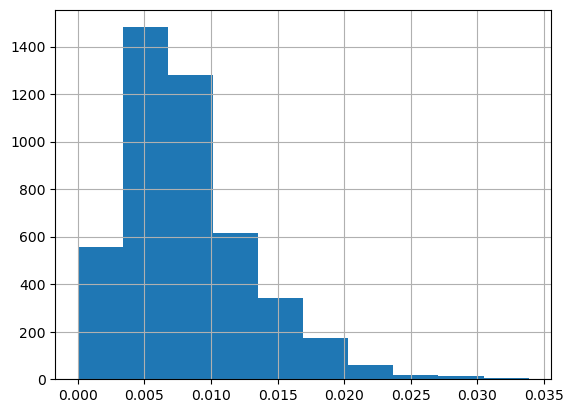

In [19]:
df[(df["TEMP_C_0_m"] > 0) & df["pl_percent"] > 0]["epistemic"].hist()

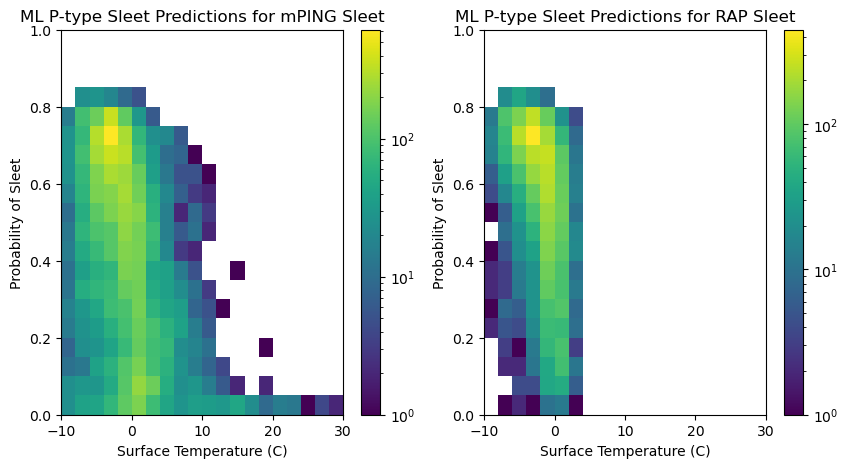

In [196]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_filtered = df[(df["TEMP_C_0_m"] >= -10) & (df["pl_percent"] > 0) ]
plt.hist2d(df_filtered["TEMP_C_0_m"], df_filtered["pred_conf3"], cmin=1, 
           bins=(np.arange(-10, 32, 2), np.arange(0, 1.05, 0.05)), 
                                                                               
           norm=LogNorm(), cmax=1e3)
plt.colorbar()
plt.xlabel("Surface Temperature (C)")
plt.ylabel("Probability of Sleet")
plt.title("ML P-type Sleet Predictions for mPING Sleet")
plt.xlim(-10, 30)
plt.subplot(1, 2, 2)
df_filtered = df[(df["TEMP_C_0_m"] >= -10) & (df["CICEP"] > 0) ]
plt.hist2d(df_filtered["TEMP_C_0_m"], df_filtered["pred_conf3"], cmin=1,
           bins=(np.arange(-10, 32, 2), np.arange(0, 1.05, 0.05)), 
                                                                               
           norm=LogNorm(), cmax=1e3)
plt.colorbar()
plt.xlabel("Surface Temperature (C)")
plt.ylabel("Probability of Sleet")
plt.title("ML P-type Sleet Predictions for RAP Sleet")
plt.savefig("rap_sleet_soundings.png", dpi=200, bbox_inches="tight")

plt.savefig("mping_sleet_soundings.png", dpi=200, bbox_inches="tight")

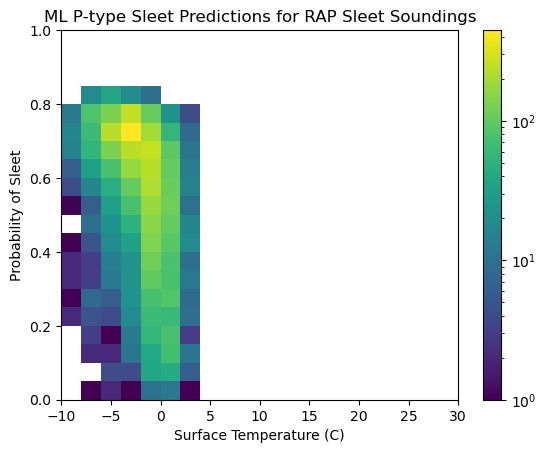

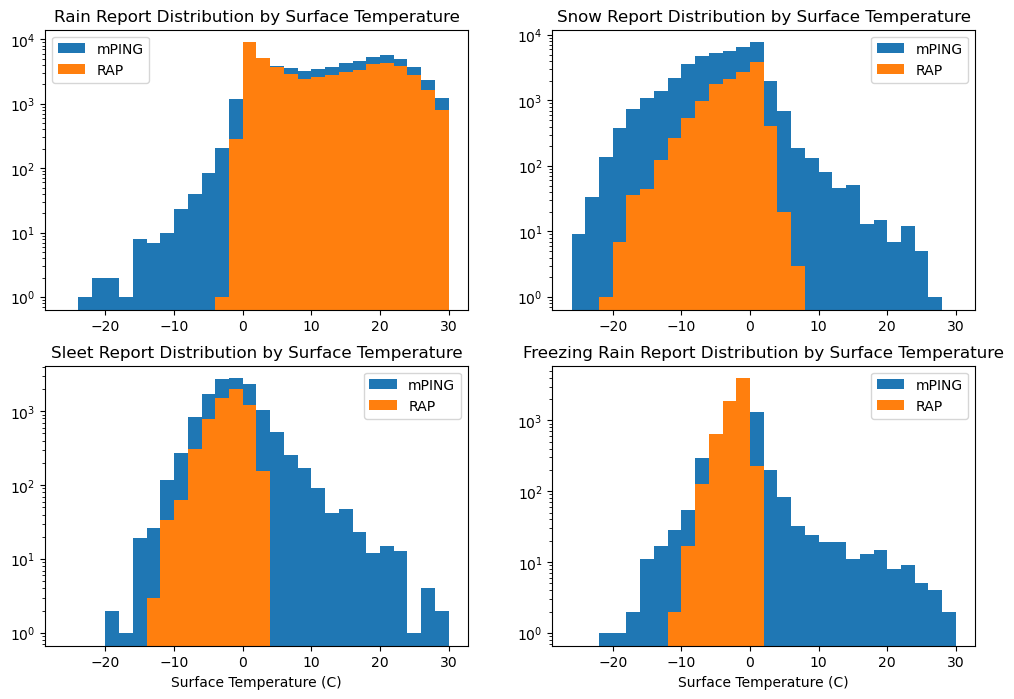

In [121]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df.loc[df["ra_percent"] > 0, "TEMP_C_0_m"], np.arange(-26, 32, 2), label="mPING")
plt.hist(df.loc[df["CRAIN"] > 0, "TEMP_C_0_m"], np.arange(-26, 32, 2), label="RAP")
plt.gca().set_yscale("log")
plt.legend()
plt.title("Rain Report Distribution by Surface Temperature")
plt.subplot(2, 2, 2)
plt.hist(df.loc[df["sn_percent"] > 0, "TEMP_C_0_m"], np.arange(-26, 32, 2), label="mPING")
plt.hist(df.loc[df["CSNOW"] > 0, "TEMP_C_0_m"], np.arange(-26, 32, 2), label="RAP")
plt.gca().set_yscale("log")
plt.legend()
plt.title("Snow Report Distribution by Surface Temperature")
plt.subplot(2, 2, 3)
plt.hist(df.loc[df["pl_percent"] > 0, "TEMP_C_0_m"], np.arange(-26, 32, 2), label="mPING")
plt.hist(df.loc[df["CICEP"] > 0, "TEMP_C_0_m"], np.arange(-26, 32, 2), label="RAP")
plt.gca().set_yscale("log")
plt.legend()
plt.title("Sleet Report Distribution by Surface Temperature")
plt.xlabel("Surface Temperature (C)")
plt.subplot(2, 2, 4)
plt.hist(df.loc[df["fzra_percent"] > 0, "TEMP_C_0_m"], np.arange(-26, 32, 2), label="mPING")
plt.hist(df.loc[df["CFRZR"] > 0, "TEMP_C_0_m"], np.arange(-26, 32, 2), label="RAP")
plt.gca().set_yscale("log")
plt.legend()
plt.title("Freezing Rain Report Distribution by Surface Temperature")
plt.xlabel("Surface Temperature (C)")
plt.savefig("ptype_dists_temp.png", dpi=200, bbox_inches="tight")

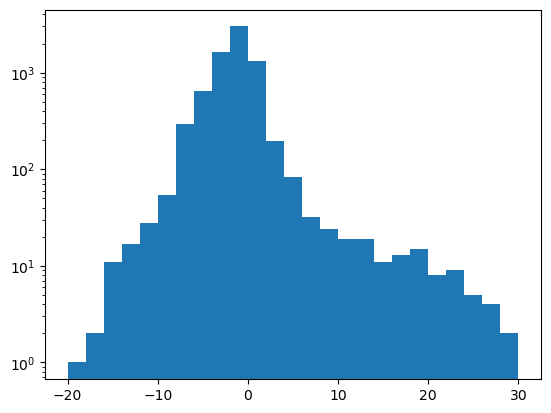

In [84]:
plt.hist(df.loc[df["fzra_percent"] > 0, "TEMP_C_0_m"], np.arange(-20, 32, 2))
plt.gca().set_yscale("log")

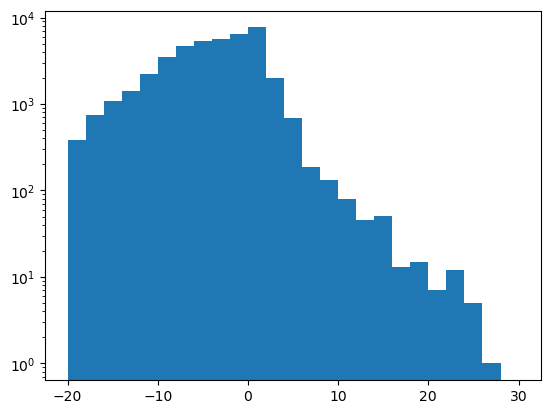

In [85]:
plt.hist(df.loc[df["sn_percent"] > 0, "TEMP_C_0_m"], np.arange(-20, 32, 2))
plt.gca().set_yscale("log")

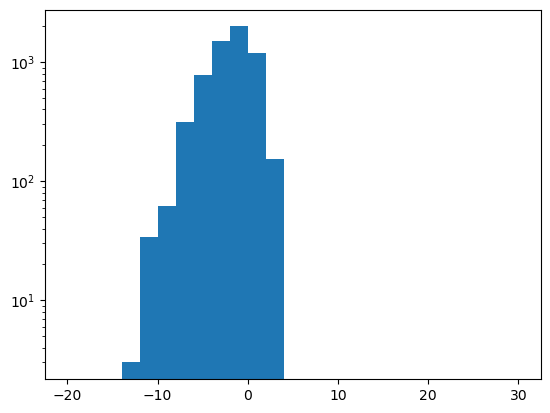

In [86]:
plt.hist(df.loc[df["CICEP"] > 0, "TEMP_C_0_m"], np.arange(-20, 32, 2))
plt.gca().set_yscale("log")

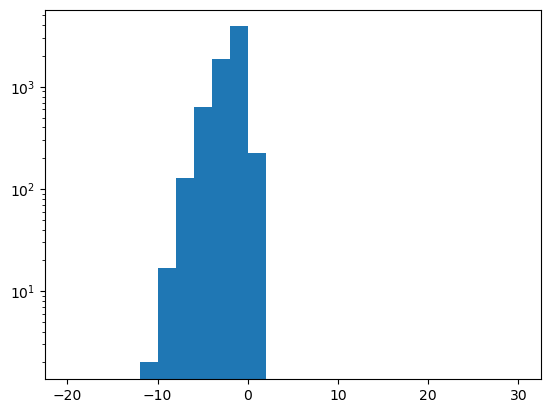

In [87]:
plt.hist(df.loc[df["CFRZR"] > 0, "TEMP_C_0_m"], np.arange(-20, 32, 2))
plt.gca().set_yscale("log")

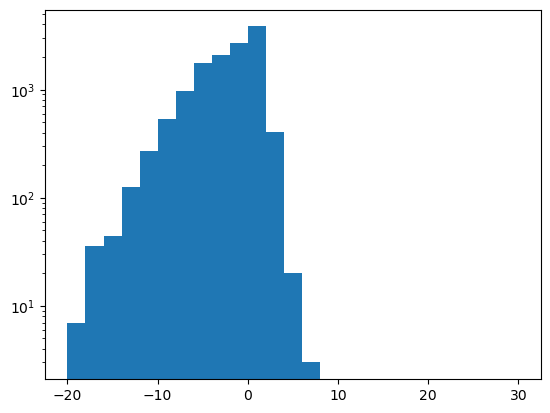

In [88]:
plt.hist(df.loc[df["CSNOW"] > 0, "TEMP_C_0_m"], np.arange(-20, 32, 2))
plt.gca().set_yscale("log")

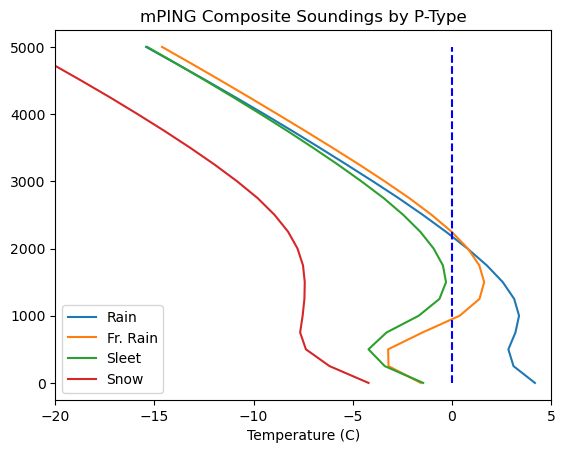

In [176]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh = 10
df_filt = df.loc[(df["ra_percent"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["fzra_percent"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["pl_percent"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["sn_percent"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')
plt.legend()
plt.title("mPING Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 5)
plt.savefig("mping_composite_soundings.png", dpi=200, bbox_inches="tight")

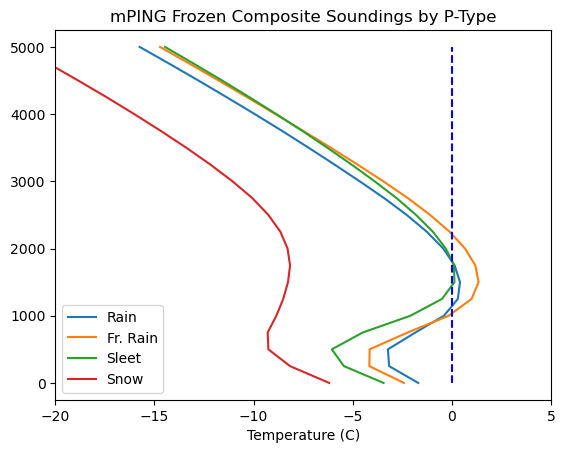

In [180]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh = 0
df_filt = df.loc[(df["ra_percent"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["fzra_percent"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["pl_percent"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["sn_percent"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')
plt.legend()
plt.title("mPING Frozen Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 5)

plt.savefig("mping_composite_soundings_frozen.png", dpi=200, bbox_inches="tight")

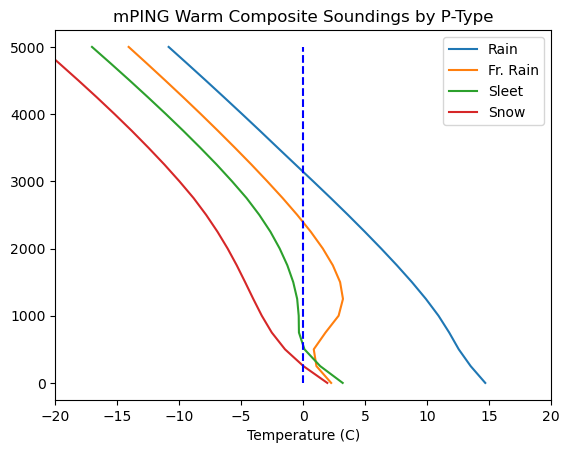

In [211]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh = 0
df_filt = df.loc[(df["ra_percent"] > 0) & (df["TEMP_C_0_m"] > t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["fzra_percent"] > 0) & (df["TEMP_C_0_m"] > t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["pl_percent"] > 0) & (df["TEMP_C_0_m"] > t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["sn_percent"] > 0) & (df["TEMP_C_0_m"] > t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')
plt.legend()
plt.title("mPING Warm Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 20)

plt.savefig("mping_composite_soundings_thawed.png", dpi=200, bbox_inches="tight")

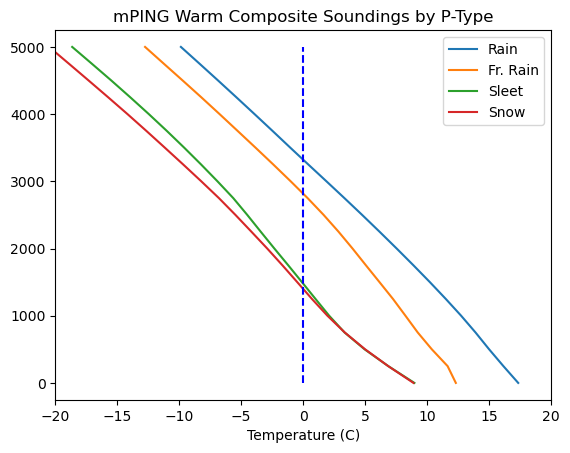

In [213]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh = 5
df_filt = df.loc[(df["ra_percent"] > 0) & (df["TEMP_C_0_m"] > t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["fzra_percent"] > 0) & (df["TEMP_C_0_m"] > t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["pl_percent"] > 0) & (df["TEMP_C_0_m"] > t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["sn_percent"] > 0) & (df["TEMP_C_0_m"] > t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')
plt.legend()
plt.title("mPING Warm Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 20)

plt.savefig("mping_composite_soundings_warm.png", dpi=200, bbox_inches="tight")

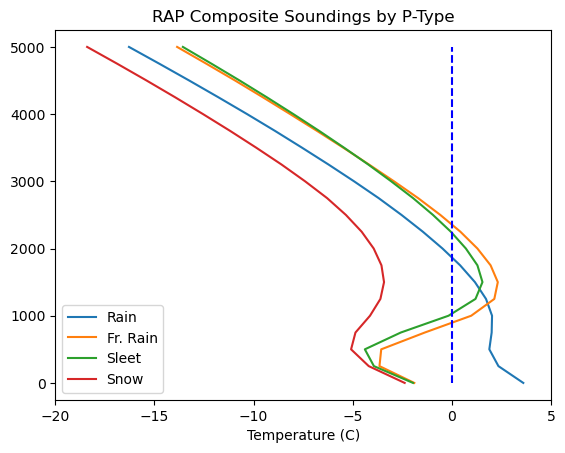

In [178]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh =10
df_filt = df.loc[(df["CRAIN"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["CFRZR"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["CICEP"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["CSNOW"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')

plt.legend()
plt.title("RAP Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 5)

plt.savefig("rap_composite_soundings.png", dpi=200, bbox_inches="tight")

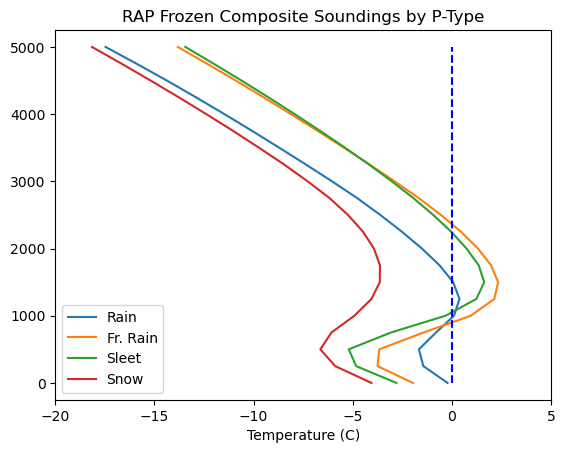

In [183]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh =0
df_filt = df.loc[(df["CRAIN"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["CFRZR"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["CICEP"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["CSNOW"] > 0) & (df["TEMP_C_0_m"] < t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')

plt.legend()
plt.title("RAP Frozen Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 5)

plt.savefig("rap_composite_soundings_frozen.png", dpi=200, bbox_inches="tight")

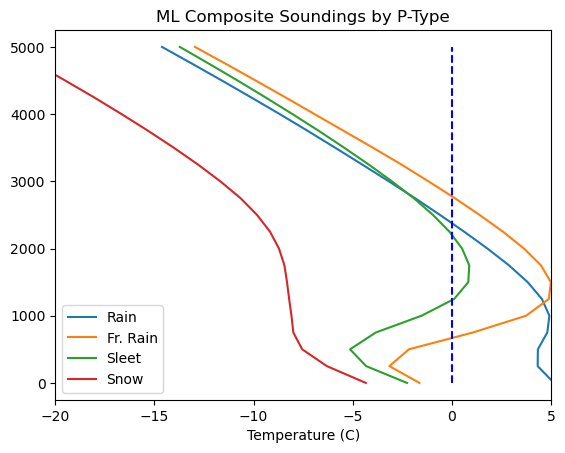

In [179]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh =10
df_filt = df.loc[(df["pred_conf1"] > 0.5) & (df["TEMP_C_0_m"] < t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["pred_conf4"] > 0.5) & (df["TEMP_C_0_m"] < t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["pred_conf3"] > 0.5) & (df["TEMP_C_0_m"] < t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["pred_conf2"] > 0.5) & (df["TEMP_C_0_m"] < t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')

plt.legend()
plt.title("ML Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 5)

plt.savefig("ml_composite_soundings.png", dpi=200, bbox_inches="tight")

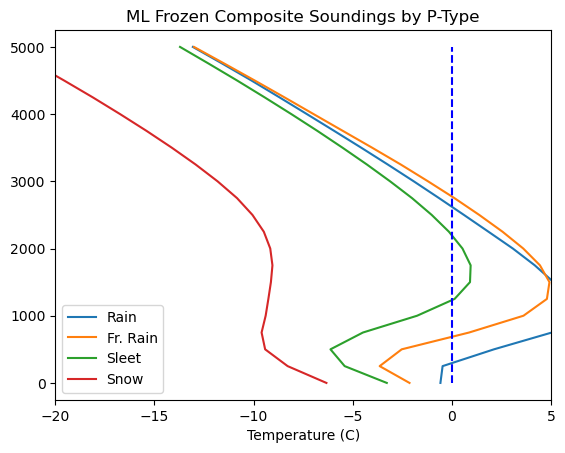

In [182]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh =0
df_filt = df.loc[(df["pred_conf1"] > 0.5) & (df["TEMP_C_0_m"] < t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["pred_conf4"] > 0.5) & (df["TEMP_C_0_m"] < t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["pred_conf3"] > 0.5) & (df["TEMP_C_0_m"] < t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["pred_conf2"] > 0.5) & (df["TEMP_C_0_m"] < t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')

plt.legend()
plt.title("ML Frozen Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 5)

plt.savefig("ml_composite_soundings_frozen.png", dpi=200, bbox_inches="tight")

/glade/scratch/dgagne/ipykernel_273520/1861398605.py:8: RuntimeWarning: Mean of empty slice.
  cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
/glade/u/home/dgagne/miniconda3/envs/risk/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


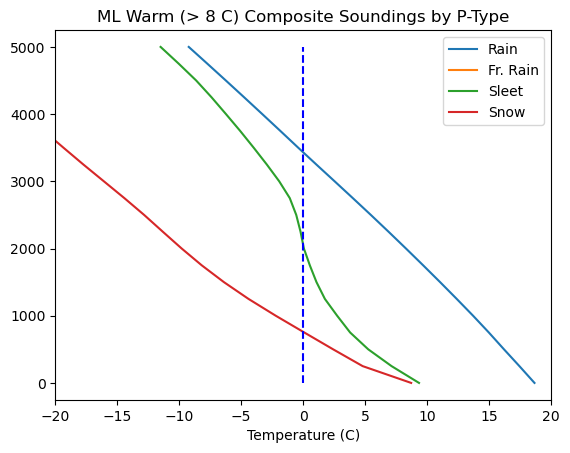

In [208]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh =8
df_filt = df.loc[(df["pred_conf1"] > 0.5) & (df["TEMP_C_0_m"] > t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["pred_conf4"] > 0.5) & (df["TEMP_C_0_m"] > t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["pred_conf3"] > 0.5) & (df["TEMP_C_0_m"] > t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["pred_conf2"] > 0.5) & (df["TEMP_C_0_m"] > t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')

plt.legend()
plt.title("ML Warm (> 8 C) Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 20)

plt.savefig("ml_composite_soundings_warm.png", dpi=200, bbox_inches="tight")

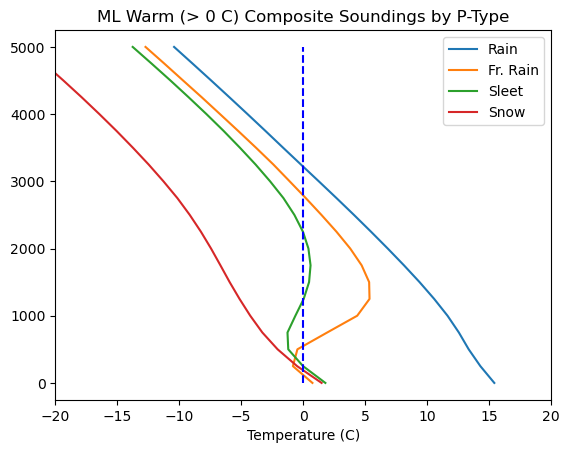

In [209]:
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh =0
df_filt = df.loc[(df["pred_conf1"] > 0.5) & (df["TEMP_C_0_m"] > t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = df.loc[(df["pred_conf4"] > 0.5) & (df["TEMP_C_0_m"] > t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = df.loc[(df["pred_conf3"] > 0.5) & (df["TEMP_C_0_m"] > t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = df.loc[(df["pred_conf2"] > 0.5) & (df["TEMP_C_0_m"] > t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')

plt.legend()
plt.title("ML Warm (> 0 C) Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 20)

plt.savefig("ml_composite_soundings_thaw.png", dpi=200, bbox_inches="tight")

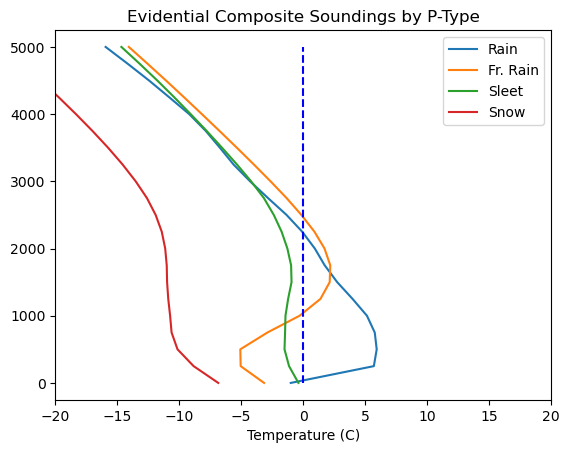

In [242]:
dfev = evidential_test
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh =0
df_filt = dfev.loc[(dfev["pred_conf1"] > 0.5) & (dfev["TEMP_C_0_m"] < t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = dfev.loc[(dfev["pred_conf4"] > 0.5) & (dfev["TEMP_C_0_m"] < t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = dfev.loc[(dfev["pred_conf3"] > 0.5) & (dfev["TEMP_C_0_m"] < t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = dfev.loc[(dfev["pred_conf2"] > 0.5) & (dfev["TEMP_C_0_m"] < t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')

plt.legend()
plt.title("Evidential Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 20)

plt.savefig("ev_composite_soundings_frozen.png", dpi=200, bbox_inches="tight")

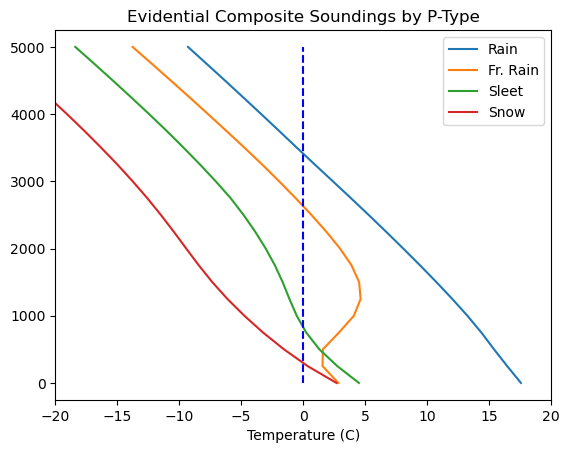

In [243]:
dfev = evidential_test
heights = np.arange(0, 5250, 250)
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
t_thresh =1
df_filt = dfev.loc[(dfev["pred_conf1"] > 0.5) & (dfev["TEMP_C_0_m"] > t_thresh)]
cold_rain_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_rain_mean, heights, label="Rain")
df_filt = dfev.loc[(dfev["pred_conf4"] > 0.5) & (dfev["TEMP_C_0_m"] > t_thresh)]
cold_fzra_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_fzra_mean, heights, label="Fr. Rain")
df_filt = dfev.loc[(dfev["pred_conf3"] > 0.5) & (dfev["TEMP_C_0_m"] > t_thresh)]
cold_pl_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_pl_mean, heights, label="Sleet")
df_filt = dfev.loc[(dfev["pred_conf2"] > 0.5) & (dfev["TEMP_C_0_m"] > t_thresh)]
cold_sn_mean = df_filt[temp_cols].values.mean(axis=0)
plt.plot(cold_sn_mean, heights, label="Snow")
plt.plot(np.zeros(heights.shape), heights, 'b--')

plt.legend()
plt.title("Evidential Composite Soundings by P-Type")
plt.xlabel("Temperature (C)")
plt.xlim(-20, 20)

plt.savefig("ev_composite_soundings_warm.png", dpi=200, bbox_inches="tight")

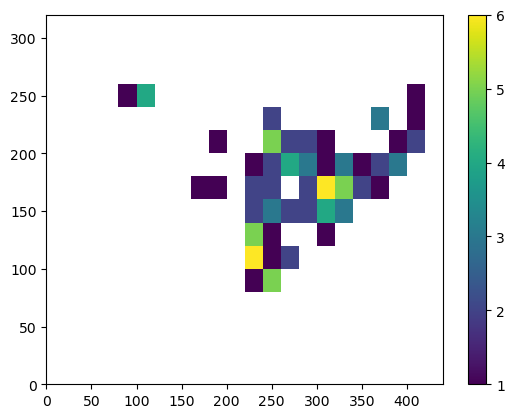

In [119]:
df_filt = df.loc[(df["ra_percent"] > 0) & (df["TEMP_C_0_m"] < -5)]
plt.hist2d(df_filt["x_m"], df_filt["y_m"], cmin=1, 
           bins=(np.arange(0, rap_ds['x'].shape[0], 20), 
                 np.arange(0, rap_ds['y'].shape[0], 20)))
plt.colorbar()

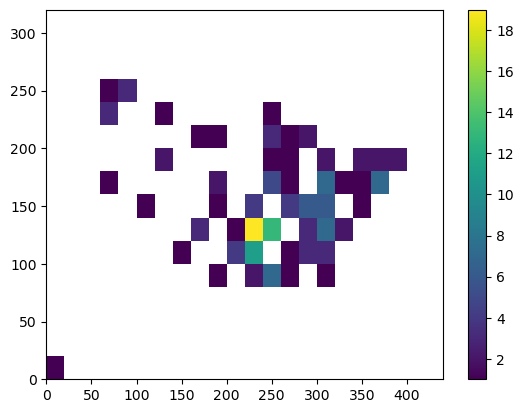

In [105]:
df_filt = df.loc[(df["pl_percent"] > 0) & (df["TEMP_C_0_m"] > 12)]
plt.hist2d(df_filt["x_m"], df_filt["y_m"], cmin=1, 
           bins=(np.arange(0, rap_ds['x'].shape[0], 20), 
                 np.arange(0, rap_ds['y'].shape[0], 20)))
plt.colorbar()

In [95]:
rap_ds

<xarray.Dataset>
Dimensions:                 (y: 337, x: 451, time: 1, press: 37)
Coordinates:
  * y                       (y) float64 0.0 1.354e+04 ... 4.538e+06 4.551e+06
  * x                       (x) float64 0.0 1.354e+04 ... 6.082e+06 6.095e+06
    latitude                (y, x) float64 ...
    longitude               (y, x) float64 ...
  * time                    (time) datetime64[ns] 2019-05-18T10:00:00
  * press                   (press) float32 1e+03 975.0 950.0 ... 125.0 100.0
Data variables: (12/97)
    COMPOSITE_REFLECTIVITY  (time, y, x) float32 ...
    VISIBILITY              (time, y, x) float32 ...
    REFL_1KM_AGL            (time, y, x) float32 ...
    REFL_4KM_AGL            (time, y, x) float32 ...
    HGT_PBL                 (time, y, x) float32 ...
    GUST_ON_SURFACE         (time, y, x) float32 ...
    ...                      ...
    LIGHTNING               (time, y, x) float32 ...
    RH_PW                   (time, y, x) float32 ...
    GOESE_WV                (time, y, x) float32 ...
    GOESE_IR                (time, y, x) float32 ...
    GOESW_WV                (time, y, x) float32 ...
    GOESW_IR                (time, y, x) float32 ...
Attributes:
    Conventions:          CF-1.0
    History:              created by wgrib2
    GRIB2_grid_template:  30

In [93]:
rap_ds.x

<xarray.DataArray 'x' (x: 451)>
array([      0.,   13545.,   27090., ..., 6068160., 6081705., 6095250.])
Coordinates:
  * x        (x) float64 0.0 1.354e+04 2.709e+04 ... 6.082e+06 6.095e+06
Attributes:
    long_name:      x coordinate of projection
    standard_name:  projection_x_coordinate
    units:          m
    grid_spacing:   13545.0

In [12]:
mping_path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/precip_rap/mPING_interpolated/"
rap_date_str = rap_date.strftime("%Y%m%d")
mping_file = join(mping_path, f"mPING_rap_{rap_date_str}.parquet")
mping_data = pd.read_parquet(mping_file)
mping_hour = mping_data.loc[mping_data["datetime"] == rap_date]

In [101]:
mping_data

,T_DEWPOINT_C_0_m,T_DEWPOINT_C_250_m,T_DEWPOINT_C_500_m,T_DEWPOINT_C_750_m,T_DEWPOINT_C_1000_m,T_DEWPOINT_C_1250_m,T_DEWPOINT_C_1500_m,T_DEWPOINT_C_1750_m,T_DEWPOINT_C_2000_m,T_DEWPOINT_C_2250_m,...,MEAN_SEA_LEVEL_Pa,CFRZR,SNOW_WATER_EQ_kg/m^2,DEWPOINT_2M_C,EL_HGT_m,TMP_ON_SURFACE_C,UGRD_10M_m/s,VGRD_10M_m/s,CICEP,TEMPERATURE_2M_C
0,12.864288,10.705775,9.540561,7.983873,5.419479,1.581041,-9.313079,-22.676070,-17.335309,-13.671928,...,102308.414062,0.0,0.0,12.864288,1513.007812,19.703308,-4.480579,1.291750,0.0,17.499115
1,-3.135712,-3.925794,-3.670082,-3.529887,-3.463926,-3.445580,-3.172644,-3.306905,-4.139920,-5.226727,...,102087.414062,0.0,0.0,-3.135712,250.507858,0.078308,-0.605579,0.479250,0.0,-0.000885
2,-0.948212,-2.709999,-3.695084,-2.167804,0.820483,2.240816,1.615641,0.632820,-0.266466,-1.204108,...,102170.414062,0.0,0.0,-0.948212,2923.507812,0.828308,-2.355579,0.354250,0.0,0.436615
3,-0.823212,-2.512787,-3.015160,-0.348028,3.262282,3.777167,2.539660,1.231300,0.073202,-0.929151,...,102179.414062,0.0,0.0,-0.823212,3209.507812,0.078308,-2.168079,0.229250,0.0,0.124115
4,-2.010712,-3.322336,-3.482571,-2.427704,-0.867379,-0.106638,-0.362387,-0.885646,-1.732492,-2.732979,...,102133.414062,1.0,0.0,-2.010712,279.507874,-0.359192,-1.918079,1.041750,0.0,-0.688385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,22.522919,21.846071,20.831325,19.639280,18.407152,17.079113,15.662926,14.243372,12.670942,10.956323,...,101236.484375,0.0,0.0,22.522919,13249.324219,23.104736,1.980062,3.739382,0.0,23.050049
1763,-0.539581,-3.148190,-5.495061,-7.872161,-12.769255,-19.873207,-25.821660,-31.136085,-33.209103,-33.308233,...,100833.484375,0.0,0.0,-0.539581,966.823730,1.917236,7.042562,-7.135618,0.0,1.550049
1764,22.585419,21.869683,20.817568,19.482992,17.926348,16.422463,14.868812,13.635229,11.560750,9.324145,...,101218.484375,0.0,0.0,22.585419,13262.824219,20.042236,0.980062,4.676882,0.0,23.237549
1765,-4.414581,-5.699619,-7.017503,-9.181780,-11.573308,-13.305404,-14.768388,-16.568033,-18.155021,-19.712512,...,101615.484375,0.0,0.0,-4.414581,280.323730,-2.707764,4.667562,0.176882,0.0,-1.637451


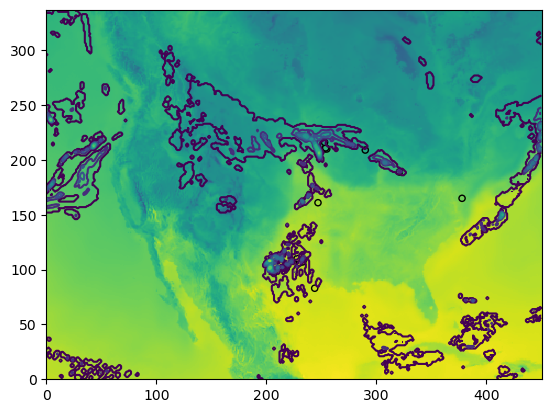

In [8]:

plt.pcolormesh(rap_height_ds["TMP"][0,0], vmin=-30, vmax=30)
plt.scatter(mping_hour["x_m"], mping_hour["y_m"], 20, mping_hour["TEMP_C_0_m"], edgecolor='k', vmin=-30, vmax=30)
plt.contour(rap_ds["PRECIP_RATE"][0])

In [91]:
rap_ds["TOTAL_PRECIP"][0].max()

NameError: name 'rap_ds' is not defined

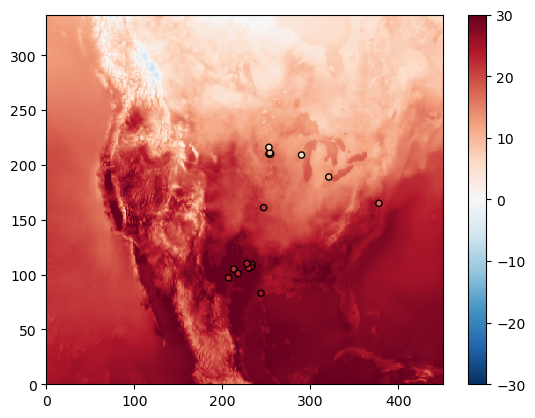

In [11]:

plt.pcolormesh(rap_height_ds["TMP"][0,0], vmin=-30, vmax=30, cmap="RdBu_r")
plt.scatter(mping_hour["x_m"], mping_hour["y_m"], 20, mping_hour["TEMP_C_0_m"], edgecolor='k', vmin=-30, vmax=30,
           cmap="RdBu_r")
plt.colorbar()

NameError: name 'mping_hour' is not defined

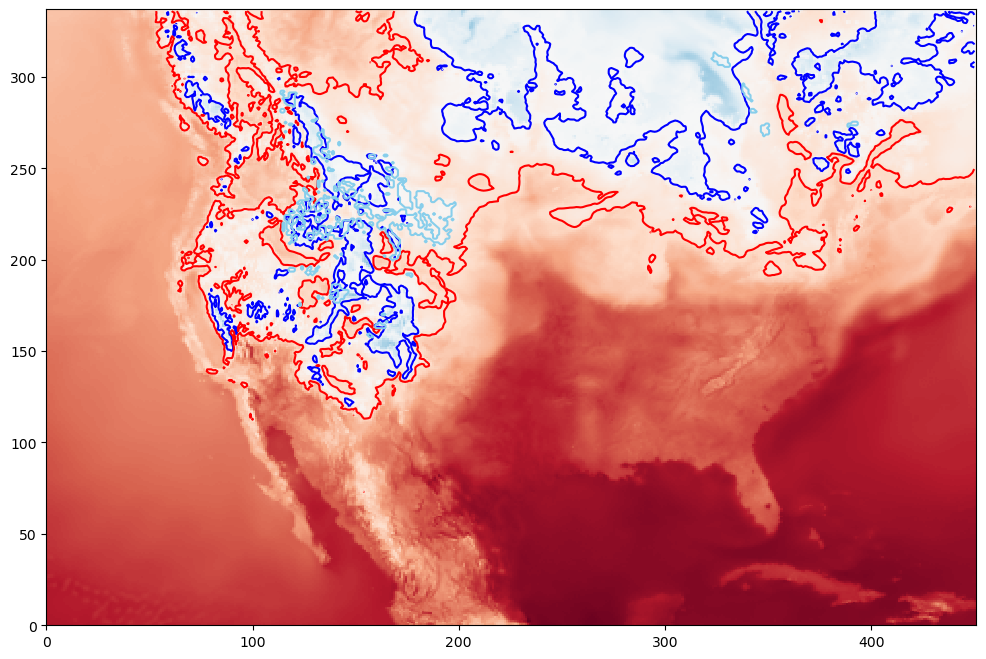

In [6]:
plt.figure(figsize=(12, 8))
plt.pcolormesh(rap_ds["TEMPERATURE_2M"][0] - 273, vmin=-30, vmax=30, cmap="RdBu_r")
plt.contour(rap_ds["TEMPERATURE_2M"][0,] - 273, [0, 5], colors=['blue', 'red'])

plt.contour(rap_ds["CSNOW"][0], [0.5], colors=['skyblue'])

plt.scatter(mping_hour["x_m"], mping_hour["y_m"], 20, mping_hour["sn_percent"], edgecolor='k', vmin=0, vmax=1,
           cmap="PiYG")
#plt.scatter(mping_hour.loc[212, "x_m"], mping_hour.loc[212, "y_m"], 60, 'green', edgecolor='k')
#plt.scatter(hot_frozen[0].iloc[0]["x_m"], mping_hour.iloc[0]["y_m"], 60, 'green', edgecolor='k')

plt.colorbar()

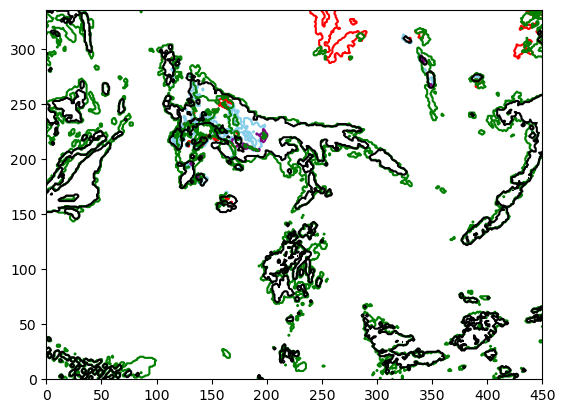

In [299]:
plt.contour(rap_ds["CSNOW"][0], [0.5], colors=['skyblue'])
plt.contour(rap_ds["CICEP"][0], [0.5], colors=['purple'])
plt.contour(rap_ds["CFRZR"][0], [0.5], colors=['red'])
plt.contour(rap_ds["CRAIN"][0], [0.5], colors=['green'])
plt.contour(rap_ds["PRECIP_RATE"][0] * 1000, [0], colors=["black"])
#plt.xlim(200, 425)
#plt.ylim(100, 200)

In [296]:
rap_ds["PRECIP_RATE"][0].max()

<xarray.DataArray 'PRECIP_RATE' ()>
array(0.0059)
Coordinates:
    time     datetime64[ns] 2019-05-18T10:00:00

In [109]:
mping_data.columns

Index(['T_DEWPOINT_C_0_m', 'T_DEWPOINT_C_250_m', 'T_DEWPOINT_C_500_m',
       'T_DEWPOINT_C_750_m', 'T_DEWPOINT_C_1000_m', 'T_DEWPOINT_C_1250_m',
       'T_DEWPOINT_C_1500_m', 'T_DEWPOINT_C_1750_m', 'T_DEWPOINT_C_2000_m',
       'T_DEWPOINT_C_2250_m',
       ...
       'MEAN_SEA_LEVEL_Pa', 'CFRZR', 'SNOW_WATER_EQ_kg/m^2', 'DEWPOINT_2M_C',
       'EL_HGT_m', 'TMP_ON_SURFACE_C', 'UGRD_10M_m/s', 'VGRD_10M_m/s', 'CICEP',
       'TEMPERATURE_2M_C'],
      dtype='object', length=438)

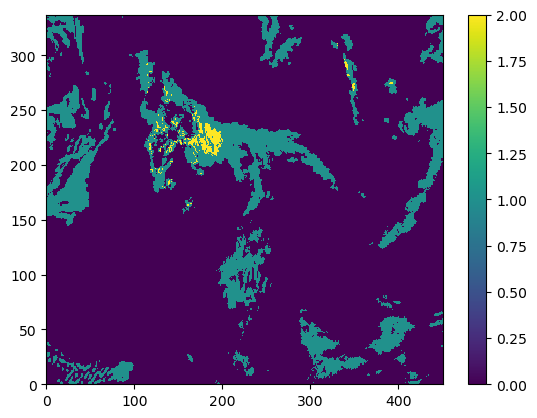

In [280]:
plt.pcolormesh(rap_ds["CSNOW"][0] + rap_ds["CICEP"][0] + rap_ds["CFRZR"][0] + rap_ds["CRAIN"][0])
plt.colorbar()


In [40]:
for col in mping_data.columns:
    print(col)

T_DEWPOINT_C_0_m
T_DEWPOINT_C_250_m
T_DEWPOINT_C_500_m
T_DEWPOINT_C_750_m
T_DEWPOINT_C_1000_m
T_DEWPOINT_C_1250_m
T_DEWPOINT_C_1500_m
T_DEWPOINT_C_1750_m
T_DEWPOINT_C_2000_m
T_DEWPOINT_C_2250_m
T_DEWPOINT_C_2500_m
T_DEWPOINT_C_2750_m
T_DEWPOINT_C_3000_m
T_DEWPOINT_C_3250_m
T_DEWPOINT_C_3500_m
T_DEWPOINT_C_3750_m
T_DEWPOINT_C_4000_m
T_DEWPOINT_C_4250_m
T_DEWPOINT_C_4500_m
T_DEWPOINT_C_4750_m
T_DEWPOINT_C_5000_m
T_DEWPOINT_C_5250_m
T_DEWPOINT_C_5500_m
T_DEWPOINT_C_5750_m
T_DEWPOINT_C_6000_m
T_DEWPOINT_C_6250_m
T_DEWPOINT_C_6500_m
T_DEWPOINT_C_6750_m
T_DEWPOINT_C_7000_m
T_DEWPOINT_C_7250_m
T_DEWPOINT_C_7500_m
T_DEWPOINT_C_7750_m
T_DEWPOINT_C_8000_m
T_DEWPOINT_C_8250_m
T_DEWPOINT_C_8500_m
T_DEWPOINT_C_8750_m
T_DEWPOINT_C_9000_m
T_DEWPOINT_C_9250_m
T_DEWPOINT_C_9500_m
T_DEWPOINT_C_9750_m
T_DEWPOINT_C_10000_m
T_DEWPOINT_C_10250_m
T_DEWPOINT_C_10500_m
T_DEWPOINT_C_10750_m
T_DEWPOINT_C_11000_m
T_DEWPOINT_C_11250_m
T_DEWPOINT_C_11500_m
T_DEWPOINT_C_11750_m
T_DEWPOINT_C_12000_m
T_DEWPOINT_C_1225

In [149]:
mping_hour["sn_percent"]

1718    0.0
1719    0.0
1720    0.0
1721    1.0
1722    0.0
1723    0.0
1724    0.0
1725    1.0
1726    1.0
1727    1.0
1728    1.0
1729    0.0
1730    0.0
1731    1.0
1732    0.0
1733    0.0
1734    0.0
1735    1.0
1736    0.0
1737    0.0
1738    0.0
1739    0.0
1740    1.0
1741    1.0
1742    0.0
1743    1.0
1744    0.0
1745    1.0
1746    1.0
1747    1.0
1748    1.0
1749    1.0
1750    1.0
1751    1.0
1752    1.0
1753    0.0
1754    1.0
1755    1.0
1756    1.0
1757    1.0
1758    1.0
1759    1.0
1760    1.0
1761    0.0
1762    0.0
1763    1.0
1764    0.0
1765    1.0
1766    0.0
Name: sn_percent, dtype: float64

In [146]:
mping_data.loc[1761, ["ra_percent", "sn_percent", "pl_percent", "fzra_percent"]]

ra_percent      1.0
sn_percent      0.0
pl_percent      0.0
fzra_percent    0.0
Name: 1761, dtype: object

In [141]:
mping_hour

,T_DEWPOINT_C_0_m,T_DEWPOINT_C_250_m,T_DEWPOINT_C_500_m,T_DEWPOINT_C_750_m,T_DEWPOINT_C_1000_m,T_DEWPOINT_C_1250_m,T_DEWPOINT_C_1500_m,T_DEWPOINT_C_1750_m,T_DEWPOINT_C_2000_m,T_DEWPOINT_C_2250_m,...,MEAN_SEA_LEVEL_Pa,CFRZR,SNOW_WATER_EQ_kg/m^2,DEWPOINT_2M_C,EL_HGT_m,TMP_ON_SURFACE_C,UGRD_10M_m/s,VGRD_10M_m/s,CICEP,TEMPERATURE_2M_C
1718,15.897919,15.209416,14.555198,13.467633,12.270928,10.651479,8.689372,7.375093,6.335142,5.292559,...,100491.484375,0.0,0.0,15.897919,5369.823730,16.792236,3.667562,5.676882,0.0,17.425049
1719,16.522919,15.624299,14.818878,13.652228,12.431475,10.876837,9.082252,7.909038,6.849073,5.730928,...,100487.484375,0.0,0.0,16.522919,4974.823730,16.729736,3.667562,5.676882,0.0,17.800049
1720,3.522919,1.800081,0.298463,0.825744,4.265313,5.893238,5.293368,4.277194,3.194905,2.075051,...,100726.484375,0.0,0.0,3.522919,4215.323730,4.042236,4.105062,-4.948118,0.0,4.425049
1721,-1.977081,-3.536126,-5.330233,-7.967802,-9.908918,-9.801772,-10.098409,-11.183913,-12.289738,-13.212453,...,101248.484375,1.0,0.0,-1.977081,446.323730,-0.020264,4.667562,-3.135618,0.0,-0.512451
1722,2.335419,0.643435,-0.580503,-1.274004,1.218330,2.107265,1.877540,1.611945,1.030666,-0.333541,...,100796.484375,0.0,0.0,2.335419,919.823730,3.417236,4.605062,-5.073118,0.0,4.112549
1723,21.272919,19.521545,19.061705,18.742517,18.057948,16.810306,15.305383,13.415662,11.814641,10.238165,...,101227.484375,0.0,0.0,21.272919,12436.324219,23.542236,2.980062,2.676882,0.0,24.487549
1724,21.085419,20.139759,19.529610,18.931134,18.100519,16.878438,15.453094,13.754930,12.298002,10.766913,...,101230.484375,0.0,0.0,21.085419,12165.324219,23.042236,3.730062,2.176882,0.0,23.175049
1725,-2.352081,-4.221510,-6.156321,-6.553560,-4.783048,-3.753668,-3.966620,-4.752221,-5.921994,-7.627272,...,100648.484375,0.0,0.0,-2.352081,509.323730,-2.020264,3.355062,-1.885618,0.0,-1.699951
1726,-4.539581,-5.326110,-6.669313,-8.096228,-8.809571,-9.130977,-9.884696,-10.576370,-11.259861,-12.258680,...,100929.484375,0.0,0.0,-4.539581,381.823730,-4.332764,2.417562,-2.385618,0.0,-3.637451
1727,-4.102081,-5.025611,-6.547487,-8.261716,-9.906641,-11.005883,-10.981058,-10.852451,-10.982092,-11.339976,...,100808.484375,0.0,0.0,-4.102081,391.323730,-3.332764,1.292562,-0.135618,0.0,-2.949951


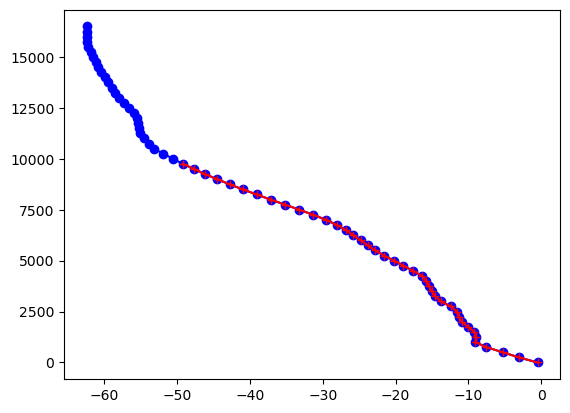

In [151]:
heights = np.arange(0, 10000, 250)
a
rap_height_temp = rap_height_ds["TMP"][0, :, mping_hour.loc[1721, "y_m"], mping_hour.loc[1721, "x_m"]]
rap_pres_temp = rap_ds["TMP"][0, :, mping_hour.loc[1721, "y_m"], mping_hour.loc[1721, "x_m"]]

rap_height = rap_height_ds["height"]
plt.plot(rap_height_temp, rap_height, 'bo-')
plt.plot(mping_hour.loc[1721, temp_cols].values, heights, 'r+-')


In [15]:
rap_parsed = rap_ds.metpy.parse_cf()

In [4]:
ls /glade/p/cisl/aiml/conv_risk_intel/rap_ncei_nc/20151128

grib2nc.csh*                  rap_130_20151128_1100_000.nc
grib2nc.table.new             rap_130_20151128_1200_000.nc
log.20151128                  rap_130_20151128_1300_000.nc
out.wgrib2                    rap_130_20151128_1400_000.nc
rap_130_20151128_0000_000.nc  rap_130_20151128_1500_000.nc
rap_130_20151128_0100_000.nc  rap_130_20151128_1600_000.nc
rap_130_20151128_0200_000.nc  rap_130_20151128_1700_000.nc
rap_130_20151128_0300_000.nc  rap_130_20151128_1800_000.nc
rap_130_20151128_0400_000.nc  rap_130_20151128_1900_000.nc
rap_130_20151128_0500_000.nc  rap_130_20151128_2000_000.nc
rap_130_20151128_0600_000.nc  rap_130_20151128_2100_000.nc
rap_130_20151128_0700_000.nc  rap_130_20151128_2200_000.nc
rap_130_20151128_0800_000.nc  rap_130_20151128_2300_000.nc
rap_130_20151128_0900_000.nc  submit_20151128.pbs*
rap_130_20151128_1000_000.nc


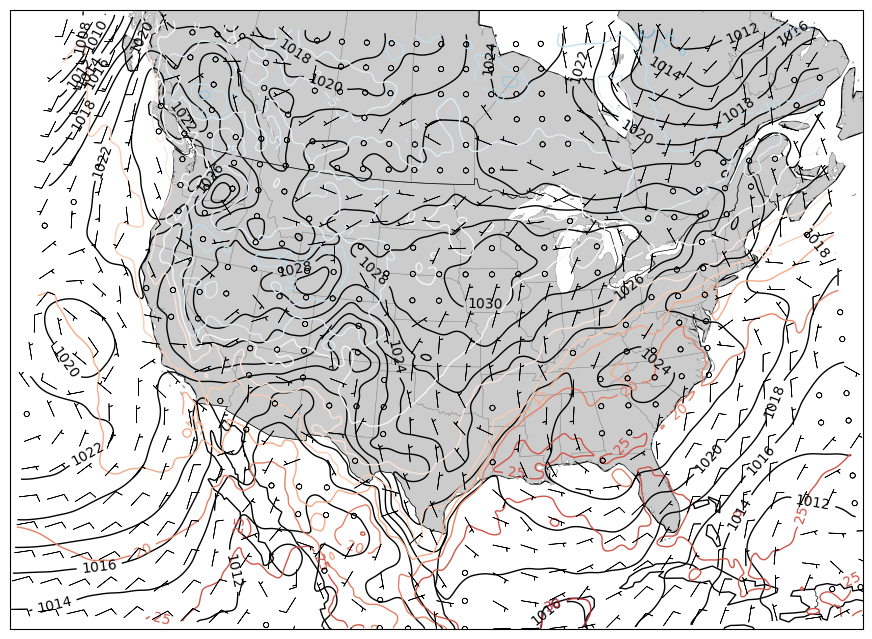

In [41]:
c_lon = -95
c_lat = 36
standard_parallels = (30, 40)
proj_lcc = ccrs.LambertConformal(central_longitude=c_lon, central_latitude=c_lat, 
                                standard_parallels=(30, 40))
fig = plt.figure(figsize=(11, 8.5))
wind_stride = 15
ax = plt.subplot(1, 1, 1, projection=proj_lcc)
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='0.5', facecolor="0.8")
# End last line with a semicolon to suppress text output to the screen
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='k')
pres_cont = ax.contour(rap_ds["longitude"], rap_ds["latitude"], 
           gaussian_filter(rap_ds["MEAN_SEA_LEVEL"][0] / 100, 2), 
          np.arange(-970, 1100, 2), colors=['k'], linewidths=1, transform=ccrs.PlateCarree())
plt.clabel(pres_cont)
temp_cont = ax.contour(rap_ds["longitude"], rap_ds["latitude"],
                       gaussian_filter(rap_ds["TEMPERATURE_2M"][0] - 273.15, 2), 
                       np.arange(-40, 45, 5), cmap="RdBu_r", vmin=-40, vmax=40,  
                       transform=ccrs.PlateCarree(), linewidths=1)
plt.clabel(temp_cont)

ax.barbs(rap_ds["longitude"][::wind_stride, ::wind_stride].values, 
         rap_ds["latitude"][::wind_stride, ::wind_stride].values, 
         rap_ds["UGRD_10M"][0, ::wind_stride, ::wind_stride].values, 
         rap_ds["VGRD_10M"][0, ::wind_stride, ::wind_stride].values,
         transform=ccrs.PlateCarree(), zorder=5, length=5, linewidth=0.5)

In [156]:
np.histogram(pd.DatetimeIndex(mping_data["datetime"]).hour.values)

(array([334,  98, 109,  94, 162, 256, 296, 164, 121, 133]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]))

In [163]:
mping_files = sorted(glob("/glade/p/cisl/aiml/ai2es/winter_ptypes/precip_rap/mPING_interpolated/mPING_rap_2019*"))
hour_bins = np.arange(25)
hour_counts = np.zeros(hour_bins.shape[0] - 1)
for mping_file in mping_files:
    mping_daily_data = pd.read_parquet(mping_file)
    hc, _ = np.histogram(pd.DatetimeIndex(mping_daily_data["datetime"]).hour.values, hour_bins)
    hour_counts += hc

<BarContainer object of 24 artists>

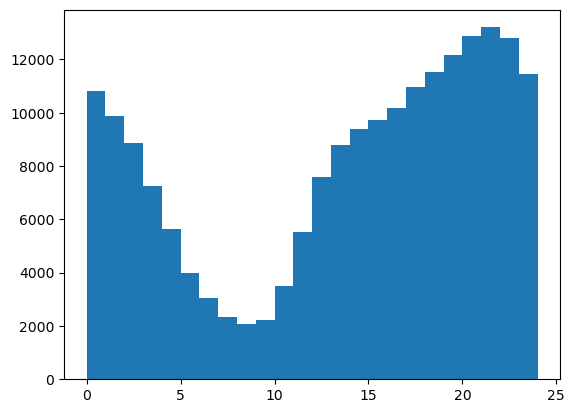

In [168]:
plt.bar(hour_bins[:-1], hour_counts, 1, align='edge')

In [169]:
mping_ha_files = sorted(glob("/glade/p/cisl/aiml/ai2es/winter_ptypes/precip_rap/mPING_hourafter_interpolated/mPING_rap_2019*"))
hour_bins = np.arange(25)
ha_hour_counts = np.zeros(hour_bins.shape[0] - 1)
for mping_file in mping_ha_files:
    mping_daily_data = pd.read_parquet(mping_file)
    hc, _ = np.histogram(pd.DatetimeIndex(mping_daily_data["datetime"]).hour.values, hour_bins)
    ha_hour_counts += hc

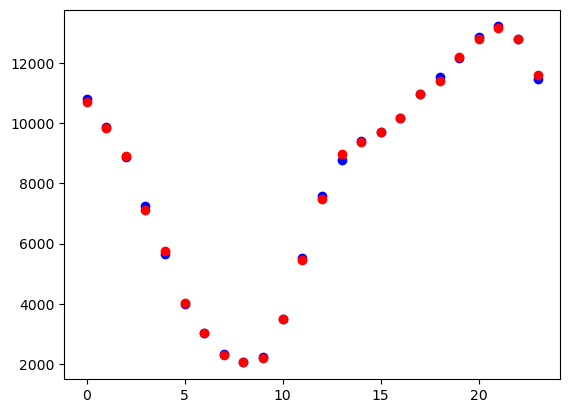

In [174]:
plt.plot(hour_bins[:-1], hour_counts, 'bo')
plt.plot((hour_bins[:-1] - 1) % 24, ha_hour_counts, 'ro')

In [5]:
mping_files = sorted(glob("/glade/p/cisl/aiml/ai2es/winter_ptypes/precip_rap/mPING_interpolated/mPING_rap_2019*"))
hot_frozen = []
for mping_file in mping_files:
    print(mping_file.split("/")[-1])
    mping_daily_data = pd.read_parquet(mping_file)
    mping_frozen = mping_daily_data[["sn_percent", "pl_percent", "fzra_percent"]].sum(axis=1) > 0
    hot_frozen.append(mping_daily_data.loc[(mping_daily_data["TEMP_C_0_m"] >= 10) & mping_frozen])
    

mPING_rap_20190202.parquet
mPING_rap_20190203.parquet
mPING_rap_20190204.parquet
mPING_rap_20190205.parquet
mPING_rap_20190206.parquet
mPING_rap_20190207.parquet
mPING_rap_20190208.parquet
mPING_rap_20190209.parquet
mPING_rap_20190210.parquet
mPING_rap_20190211.parquet
mPING_rap_20190212.parquet
mPING_rap_20190213.parquet
mPING_rap_20190214.parquet
mPING_rap_20190215.parquet
mPING_rap_20190216.parquet
mPING_rap_20190217.parquet
mPING_rap_20190218.parquet
mPING_rap_20190219.parquet
mPING_rap_20190220.parquet
mPING_rap_20190221.parquet
mPING_rap_20190222.parquet
mPING_rap_20190223.parquet
mPING_rap_20190224.parquet
mPING_rap_20190225.parquet
mPING_rap_20190226.parquet
mPING_rap_20190227.parquet
mPING_rap_20190228.parquet
mPING_rap_20190301.parquet
mPING_rap_20190302.parquet
mPING_rap_20190303.parquet
mPING_rap_20190304.parquet
mPING_rap_20190305.parquet
mPING_rap_20190306.parquet
mPING_rap_20190307.parquet
mPING_rap_20190308.parquet
mPING_rap_20190309.parquet
mPING_rap_20190310.parquet
m

In [239]:
hot_frozen[237][["datetime", "report_count", "ra_percent", "sn_percent", "pl_percent", "fzra_percent"]]

,datetime,report_count,ra_percent,sn_percent,pl_percent,fzra_percent
0,2019-09-28 00:00:00,4,0.500000,0.0,0.500000,0.0
25,2019-09-28 00:00:00,1,0.000000,0.0,1.000000,0.0
69,2019-09-28 01:00:00,1,0.000000,0.0,1.000000,0.0
70,2019-09-28 01:00:00,3,0.333333,0.0,0.666667,0.0
86,2019-09-28 01:00:00,1,0.000000,1.0,0.000000,0.0
89,2019-09-28 01:00:00,1,0.000000,1.0,0.000000,0.0
95,2019-09-28 02:00:00,2,0.000000,1.0,0.000000,0.0
112,2019-09-28 02:00:00,5,0.200000,0.0,0.800000,0.0
380,2019-09-28 19:00:00,1,0.000000,1.0,0.000000,0.0
470,2019-09-28 22:00:00,1,0.000000,1.0,0.000000,0.0


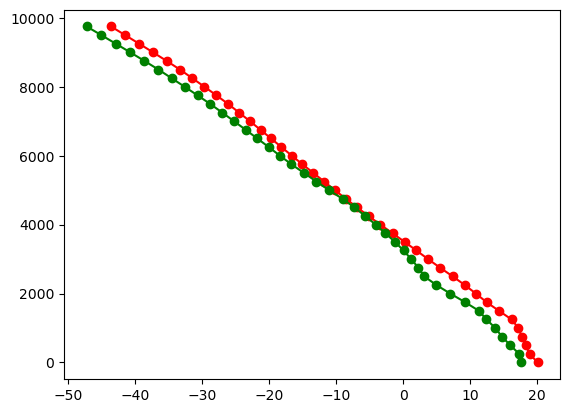

In [274]:
temp_cols = [f"TEMP_C_{h}_m" for h in heights]
dewp_cols = [f"T_DEWPOINT_C_{h}_m" for h in heights]
plt.plot(hot_frozen[105].loc[569, temp_cols], heights, 'ro-')
plt.plot(hot_frozen[105].loc[569, dewp_cols], heights, 'go-')

In [18]:
hot_frozen[3][["x_m", "y_m", "datetime", "ra_percent", "sn_percent", "pl_percent", "fzra_percent", "TEMP_C_0_m"]]

,x_m,y_m,datetime,ra_percent,sn_percent,pl_percent,fzra_percent,TEMP_C_0_m
538,110,146,2019-02-05 21:00:00,0.0,0.0,1.0,0.0,10.054840
596,254,140,2019-02-05 22:00:00,0.0,0.0,0.0,1.0,18.241089


In [14]:
hot_frozen[105]["TEM

,T_DEWPOINT_C_0_m,T_DEWPOINT_C_250_m,T_DEWPOINT_C_500_m,T_DEWPOINT_C_750_m,T_DEWPOINT_C_1000_m,T_DEWPOINT_C_1250_m,T_DEWPOINT_C_1500_m,T_DEWPOINT_C_1750_m,T_DEWPOINT_C_2000_m,T_DEWPOINT_C_2250_m,...,CSNOW,VGRD_10M_m/s,CFRZR,SNOW_DEPTH_m,CRAIN,TMP_ON_SURFACE_C,CICEP,DEWPOINT_DEPRES_2M_C,HGT_ON_0CISOTHM_m,TEMPERATURE_2M_C
43,6.661896,4.174650,3.248073,1.454050,-0.400881,-2.180499,-3.768062,-4.911456,-5.634943,-6.209631,...,0.0,-3.500872,0.0,0.0,1.0,10.889618,0.0,-269.649994,3230.0,10.186310
172,15.620331,14.016500,13.190886,12.442192,10.302899,7.425627,5.969930,5.780491,5.467562,4.422238,...,0.0,-1.735798,0.0,0.0,0.0,13.857300,0.0,-271.962494,3710.0,16.780060
447,-8.302002,-8.552272,-9.265350,-9.717426,-10.103792,-10.598582,-11.590226,-13.327075,-15.717522,-18.546506,...,0.0,-0.924692,0.0,0.0,0.0,17.909027,0.0,-254.712494,3060.0,10.148438
531,0.995178,-2.297257,-2.923457,-3.569491,-4.949196,-6.508034,-7.982921,-9.548167,-11.267425,-12.967180,...,0.0,-3.653681,0.0,0.0,0.0,17.331543,0.0,-261.274994,2840.0,12.879669
569,17.578278,17.310242,15.970180,14.744163,13.744383,12.421028,11.292328,9.236550,7.028042,4.931782,...,0.0,6.664294,0.0,0.0,1.0,21.470367,0.0,-270.712494,3820.0,20.046814
704,-3.131989,-5.451290,-6.381513,-6.982096,-7.301554,-7.566305,-8.083964,-9.152777,-11.386938,-13.454124,...,0.0,-4.202417,0.0,0.0,0.0,20.387939,0.0,-256.774994,3020.0,13.231018
951,-2.035614,-4.681742,-5.288975,-5.858504,-6.363614,-7.176737,-8.421949,-9.953075,-12.027939,-14.481719,...,0.0,-1.802919,0.0,0.0,1.0,15.104980,0.0,-259.712494,3140.0,11.455261
959,1.839386,-4.755044,-5.775704,-6.614797,-7.111727,-7.514360,-7.840232,-8.384533,-9.175053,-10.472472,...,0.0,-2.240419,0.0,0.0,1.0,16.292480,0.0,-259.462494,3190.0,15.517761


In [272]:
hl = np.array([hf.shape[0] for hf in hot_frozen])
dates = [mf.split("/")[-1].split("_")[-1][:8] for mf in mping_files]
i = 0
for date, hcount in zip(dates, hl):
    print(i, date, hcount)
    i += 1

0 20190202 1
1 20190203 2
2 20190204 1
3 20190205 2
4 20190206 1
5 20190207 0
6 20190208 1
7 20190209 2
8 20190210 0
9 20190211 1
10 20190212 0
11 20190213 0
12 20190214 0
13 20190215 0
14 20190216 1
15 20190217 0
16 20190218 0
17 20190219 0
18 20190220 0
19 20190221 5
20 20190222 1
21 20190223 1
22 20190224 1
23 20190225 1
24 20190226 2
25 20190227 0
26 20190228 1
27 20190301 0
28 20190302 1
29 20190303 0
30 20190304 0
31 20190305 0
32 20190306 2
33 20190307 0
34 20190308 1
35 20190309 1
36 20190310 0
37 20190311 1
38 20190312 0
39 20190313 2
40 20190314 6
41 20190315 3
42 20190316 1
43 20190317 0
44 20190318 0
45 20190319 1
46 20190320 0
47 20190321 0
48 20190322 5
49 20190323 1
50 20190324 2
51 20190325 1
52 20190326 0
53 20190327 3
54 20190328 1
55 20190329 0
56 20190330 0
57 20190331 0
58 20190401 3
59 20190402 0
60 20190403 1
61 20190404 1
62 20190405 0
63 20190406 2
64 20190407 2
65 20190408 3
66 20190409 1
67 20190410 4
68 20190411 0
69 20190412 2
70 20190413 2
71 20190414 3
72

In [211]:
hot_frozen_merged = pd.concat(hot_frozen, ignore_index=True)

(array([[nan, nan, nan, ..., nan, nan, 53.],
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan]]),
 array([  0. ,   4.5,   9. ,  13.5,  18. ,  22.5,  27. ,  31.5,  36. ,
         40.5,  45. ,  49.5,  54. ,  58.5,  63. ,  67.5,  72. ,  76.5,
         81. ,  85.5,  90. ,  94.5,  99. , 103.5, 108. , 112.5, 117. ,
        121.5, 126. , 130.5, 135. , 139.5, 144. , 148.5, 153. , 157.5,
        162. , 166.5, 171. , 175.5, 180. , 184.5, 189. , 193.5, 198. ,
        202.5, 207. , 211.5, 216. , 220.5, 225. , 229.5, 234. , 238.5,
        243. , 247.5, 252. , 256.5, 261. , 265.5, 270. , 274.5, 279. ,
        283.5, 288. , 292.5, 297. , 301.5, 306. , 310.5, 315. , 319.5,
        324. , 328.5, 333. , 337.5, 342. , 346.5, 351. , 355.5, 360. ,
        364.5, 369. , 373.5, 378. , 382.5, 387. , 391.5, 396. , 400.5,
     

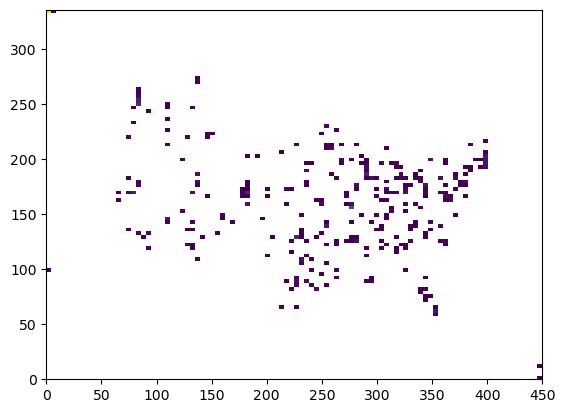

In [215]:
plt.hist2d(hot_frozen_merged["x_m"], hot_frozen_merged["y_m"], bins=100, cmin=1)

In [236]:
[mf.split('/')[-1].split("_")[-1][:8] for mf in mping_files][237]

'20190928'

In [255]:
(hot_frozen_merged[["ra_percent", "sn_percent", "pl_percent", "fzra_percent"]]).sum(axis=0)

ra_percent       61.000000
sn_percent      143.500000
pl_percent      159.142857
fzra_percent    120.357143
dtype: float64

(array([ 0., 10., 18., 30., 35., 25., 15., 11., 10., 13., 13., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 12 artists>)

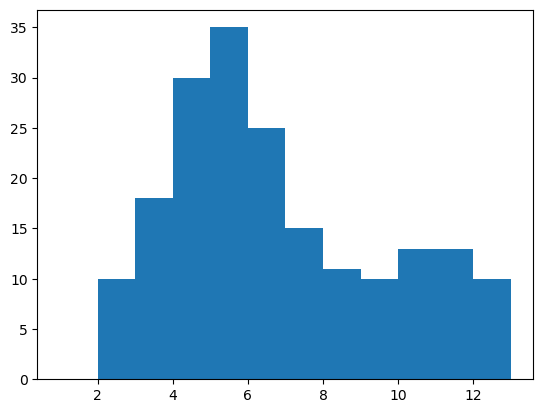

In [300]:
plt.hist(pd.DatetimeIndex(hot_frozen_merged[hot_frozen_merged["pl_percent"] > 0]["datetime"]).month, np.arange(1, 14))

(array([ 0.,  4.,  9., 17., 18.,  9.,  7., 17., 24., 36., 12.,  6.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 12 artists>)

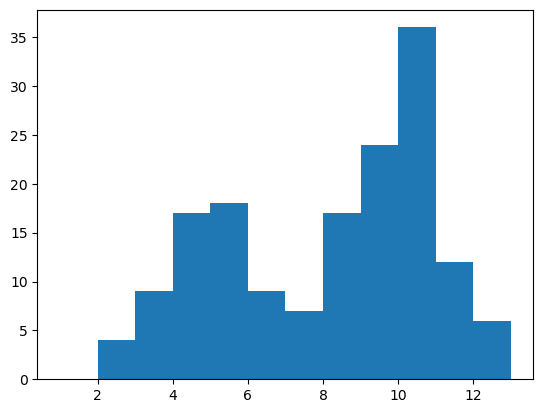

In [302]:
plt.hist(pd.DatetimeIndex(hot_frozen_merged[hot_frozen_merged["sn_percent"] > 0]["datetime"]).month, 
         np.arange(1, 14))

(array([ 0., 10.,  6., 14., 17., 22., 15., 20.,  9., 17.,  8.,  5.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 12 artists>)

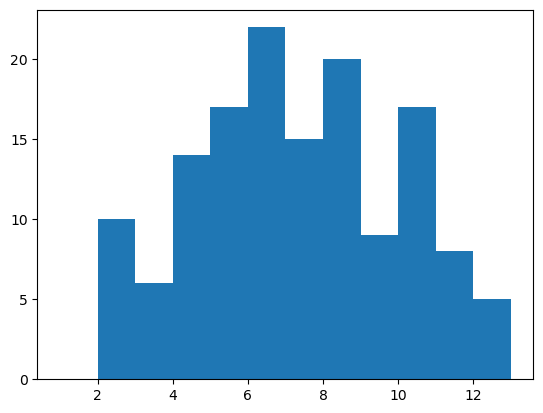

In [303]:
plt.hist(pd.DatetimeIndex(hot_frozen_merged[hot_frozen_merged["fzra_percent"] > 0]["datetime"]).month, 
         np.arange(1, 14))

In [265]:
hot_frozen_merged["datetime"]

0     2019-02-02 22:00:00
1     2019-02-03 18:00:00
2     2019-02-03 20:00:00
3     2019-02-04 19:00:00
4     2019-02-05 21:00:00
              ...        
479   2019-12-25 08:00:00
480   2019-12-27 23:00:00
481   2019-12-29 03:00:00
482   2019-12-29 13:00:00
483   2019-12-29 15:00:00
Name: datetime, Length: 484, dtype: datetime64[ns]

<Axes: >

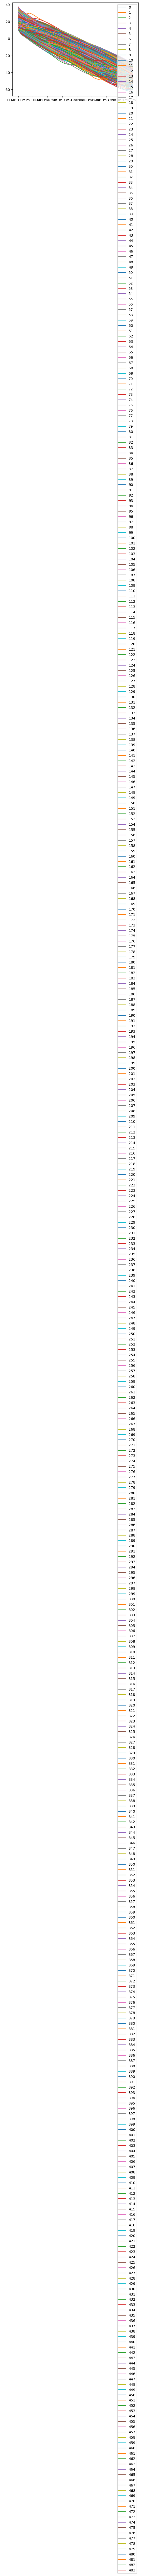

In [312]:
hot_frozen_merged[temp_cols].T.plot()

In [310]:
temp_cols

['TEMP_C_0_m',
 'TEMP_C_250_m',
 'TEMP_C_500_m',
 'TEMP_C_750_m',
 'TEMP_C_1000_m',
 'TEMP_C_1250_m',
 'TEMP_C_1500_m',
 'TEMP_C_1750_m',
 'TEMP_C_2000_m',
 'TEMP_C_2250_m',
 'TEMP_C_2500_m',
 'TEMP_C_2750_m',
 'TEMP_C_3000_m',
 'TEMP_C_3250_m',
 'TEMP_C_3500_m',
 'TEMP_C_3750_m',
 'TEMP_C_4000_m',
 'TEMP_C_4250_m',
 'TEMP_C_4500_m',
 'TEMP_C_4750_m',
 'TEMP_C_5000_m',
 'TEMP_C_5250_m',
 'TEMP_C_5500_m',
 'TEMP_C_5750_m',
 'TEMP_C_6000_m',
 'TEMP_C_6250_m',
 'TEMP_C_6500_m',
 'TEMP_C_6750_m',
 'TEMP_C_7000_m',
 'TEMP_C_7250_m',
 'TEMP_C_7500_m',
 'TEMP_C_7750_m',
 'TEMP_C_8000_m',
 'TEMP_C_8250_m',
 'TEMP_C_8500_m',
 'TEMP_C_8750_m',
 'TEMP_C_9000_m',
 'TEMP_C_9250_m',
 'TEMP_C_9500_m',
 'TEMP_C_9750_m']